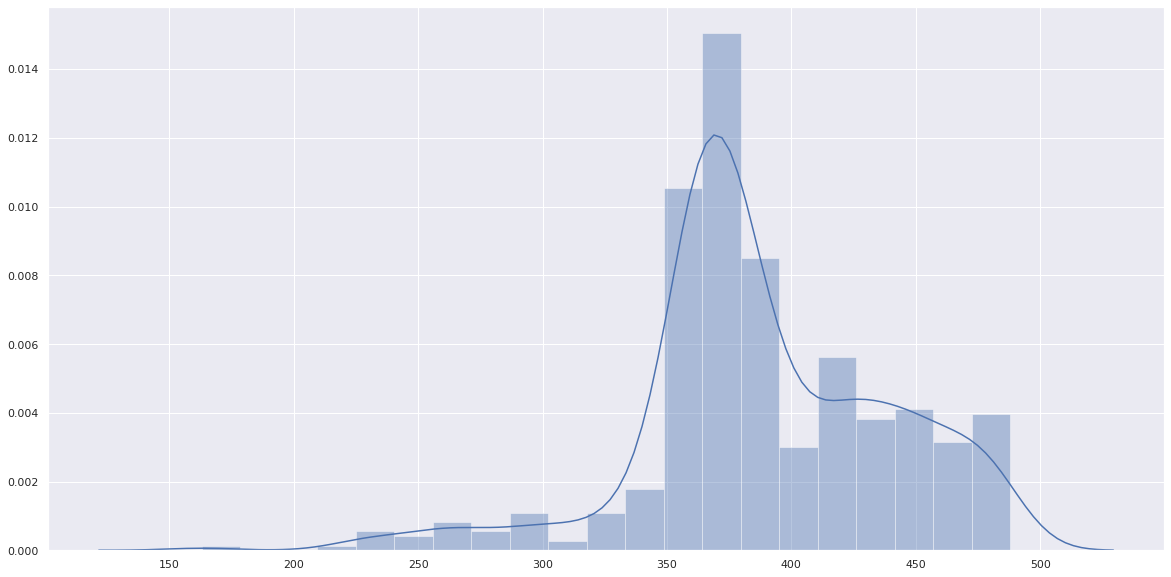

In [372]:
import seaborn as sns
# sns.distplot(data[data['weekday']==0]['target_value'].values,  label='Mon')
# sns.distplot(data[data['weekday']==1]['target_value'].values,  label='Tue')
# sns.distplot(data[data['weekday']==2]['target_value'].values,  label='Wed')
# sns.distplot(data[data['weekday']==3]['target_value'].values,  label='Thur')
# sns.distplot(data[data['weekday']==4]['target_value'].values,  label='Fri')
# sns.distplot(data[data['weekday']==5]['target_value'].values,  label='Sat')
# sns.distplot(data[data['weekday']==6]['target_value'].values,  label='Sun')
# plt.legend(title="weekday")
sns.distplot(data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)]['target_value'].values)
plt.show()

In [10]:
import pandas as pd
data=pd.read_csv('김천input.csv')
data=data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]
data=data.reset_index().drop('index',axis=1)
data1=data[data['target_value'].values>350]
data2=data[350<=data['target_value'].values]
# data3=data[400<data['target_value'].values]

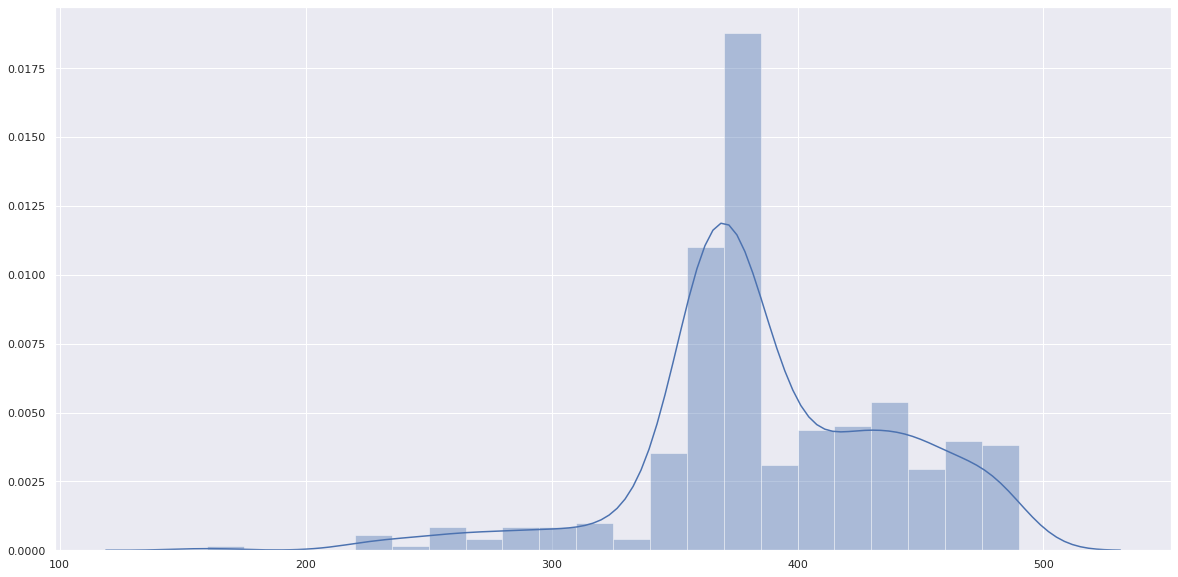

In [348]:
data=pd.read_csv('김천input.csv')
data=data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]
data=data.reset_index().drop('index',axis=1)
data['target_value']=data['target_value'].apply(lambda x  : round(x,-1))
sns.distplot(data['target_value'].values)
plt.show()

In [283]:
import numpy as np
mean_list=[]
for x in range(6,600,7):
    mean_list.extend(list(np.repeat(data.loc[x:x+4,'target_value'].mean(),5, 0)))

In [284]:
len(mean_list)

425

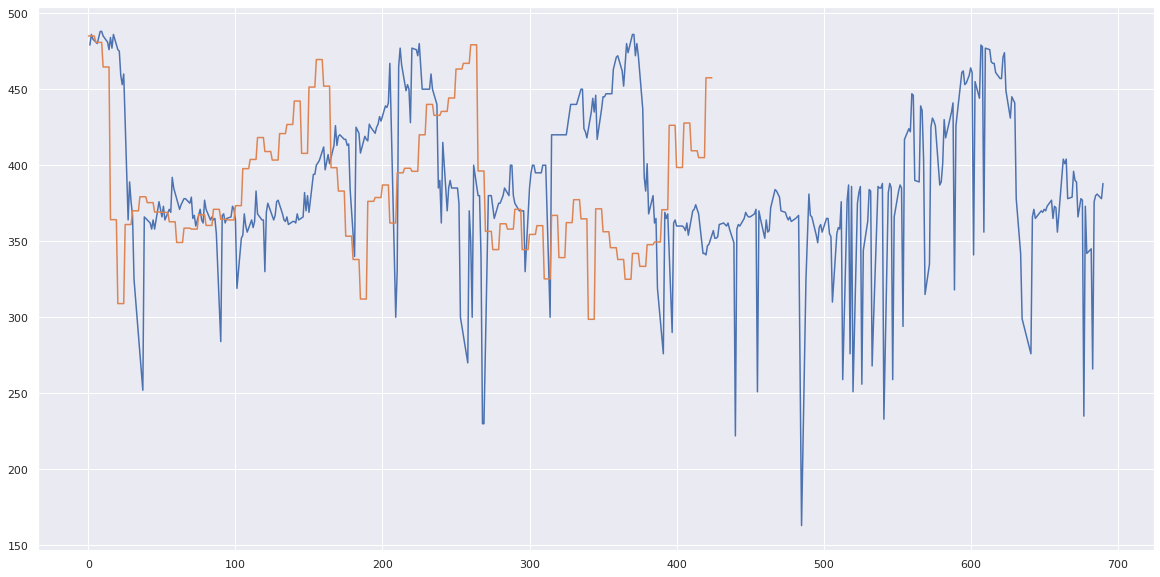

In [285]:
# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname=path, size=70).get_name()
# plt.rc('font', family=font_name)
plt.rcParams['figure.figsize']=(20,10)
# plt.figure(figsize=(6000,200))
data=pd.read_csv('김천input.csv')
data=data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]
data['target_value'].plot() 
pd.Series(mean_list).plot()
plt.show()

### 로그 변환

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Skewness: -2.171
Skewness: -1.258


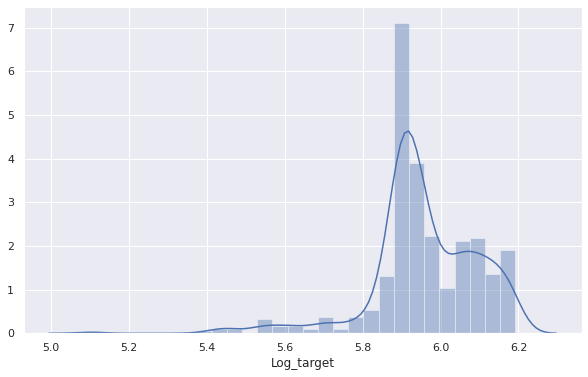

In [161]:
data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)]["Log_target"] = np.log1p(data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)]['target_value']) 
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]["Log_target"]) 
print("Skewness: {:.3f}".format(data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)]['target_value'].skew()))
print("Skewness: {:.3f}".format(data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]["Log_target"].skew()))


### box-cox 변환

0.04130493315251752


array([479., 486., 483., 480., 484., 488., 488., 485., 481., 476., 484.,
       477., 486., 476., 475., 459., 453., 460., 364., 389., 376., 367.,
       325., 252., 366., 363., 362., 358., 364., 358., 376., 371., 366.,
       373., 364., 371., 369., 392., 385., 371., 374., 376., 378., 378.,
       375., 379., 365., 367., 360., 371., 364., 362., 377., 371., 364.,
       366., 364., 365., 355., 284., 367., 368., 362., 365., 366., 373.,
       371., 364., 319., 352., 354., 368., 360., 356., 364., 359., 363.,
       383., 368., 364., 364., 330., 369., 375., 364., 367., 376., 377.,
       368., 364., 363., 366., 361., 363., 363., 362., 368., 364., 366.,
       382., 370., 380., 369., 394., 394., 400., 403., 412., 397., 402.,
       407., 401., 413., 426., 413., 419., 420., 417., 417., 413., 414.,
       384., 340., 425., 423., 421., 408., 419., 417., 416., 427., 425.,
       421., 425., 427., 432., 429., 439., 438., 441., 467., 426., 300.,
       331., 465., 477., 466., 449., 453., 450., 42

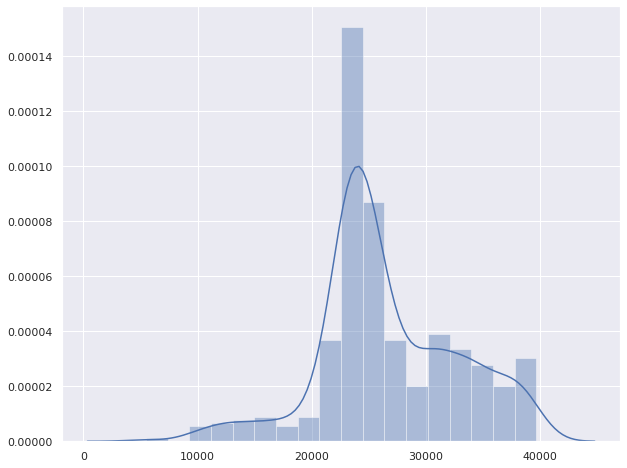

In [190]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
df_boxcox = pd.Series(stats.boxcox(data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]['target_value'])[0])
# skewness 확인
print(df_boxcox.skew())
# KDE plot 출력
sns.distplot(df_boxcox);

#inverse 변환
from scipy.stats import boxcox
from scipy.special import inv_boxcox
df_boxcox, param = stats.boxcox(data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]['target_value'])
inv_boxcox(df_boxcox, param)

In [365]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

data=pd.read_csv('김천input.csv')
data=data[(data['weekday']!=6)&(data['weekday']!=5)&(data['holiday']==0)&(data['target_value']!=0)]
data=data.reset_index().drop('index',axis=1)
data['target_value']=data['target_value'].apply(lambda x  : round(x,-1)) #클래스 나누기
df_boxcox, param = boxcox(data['target_value'])
data['target_value']=pd.Series(df_boxcox)
weekday_data=data[data['timestamp']<'2020-08-30'] 
test=data[(data['timestamp']>='2020-09-07')&(data['timestamp']<='2020-09-11')] 

# from sklearn.preprocessing import PowerTransformer
# transformer = PowerTransformer()
# transformer.fit(train['target_value'].values.reshape(-1,1))
# savedLamdas = transformer.lambdas_
# train['target_value']=transformer.transform(train['target_value'].values.reshape(-1,1))

X_train1 = pd.DataFrame(weekday_data[weekday_data.columns.difference(['target_value','timestamp','dayofweek_mean','abnormal'])])
y_train1 = pd.Series(weekday_data['target_value'].values)

# data1=pd.read_csv('김천input.csv')
# data1=data1[(data1['weekday']!=6)&(data1['weekday']!=5)&(data1['holiday']==0)&(data1['target_value']!=0)]
# data1=data1.reset_index().drop('index',axis=1)
# test1=data1[(data1['timestamp']>='2020-09-07')&(data1['timestamp']<='2020-09-11')] 
XX_test=pd.DataFrame(test1[test1.columns.difference(['target_value','timestamp','dayofweek_mean','abnormal'])])
yy_test=pd.Series(test1['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1)

regressor1 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=8
)
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(k_neighbors=2)
# X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

regressor1.fit(X_train, y_train, early_stopping_rounds=200,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor1.predict(XX_test)

#inverse 변환
y_pred=inv_boxcox(y_pred, param)
# yy_test=inv_boxcox(yy_test, param)
from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

[0]	validation_0-rmse:21669.94727
[1]	validation_0-rmse:20642.64062
[2]	validation_0-rmse:19667.40820
[3]	validation_0-rmse:18745.58398
[4]	validation_0-rmse:17868.55859
[5]	validation_0-rmse:17060.23438
[6]	validation_0-rmse:16276.88965
[7]	validation_0-rmse:15531.75391
[8]	validation_0-rmse:14834.70996
[9]	validation_0-rmse:14179.99316
[10]	validation_0-rmse:13556.45996
[11]	validation_0-rmse:12967.98340
[12]	validation_0-rmse:12433.60059
[13]	validation_0-rmse:11923.12305
[14]	validation_0-rmse:11441.96191
[15]	validation_0-rmse:10982.60449
[16]	validation_0-rmse:10569.61621
[17]	validation_0-rmse:10168.08301
[18]	validation_0-rmse:9807.40137
[19]	validation_0-rmse:9462.77051
[20]	validation_0-rmse:9150.81738
[21]	validation_0-rmse:8854.32227
[22]	validation_0-rmse:8575.89062
[23]	validation_0-rmse:8304.54004
[24]	validation_0-rmse:8065.42725
[25]	validation_0-rmse:7845.19873
[26]	validation_0-rmse:7647.12451
[27]	validation_0-rmse:7453.91846
[28]	validation_0-rmse:7274.97461
[29]	v

97.56855143672956

In [366]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

97.56855143672956

In [340]:
data1

,timestamp,target_value,dayofweek_mean,dayofweek_median,weekday,temperature,rainfall,holiday,before_holiday,after_holiday,abnormal,gate
0,2019-01-02,479,368,378,2,3.7,0.0,0,0,1,0,191.0
1,2019-01-03,486,366,374,3,5.2,0.0,0,0,0,0,194.0
2,2019-01-04,483,363,371,4,6.7,0.0,0,0,0,0,203.0
3,2019-01-07,480,371,375,0,5.4,0.0,0,0,0,0,177.0
4,2019-01-08,484,382,382,1,4.8,0.0,0,0,0,0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,2020-11-18,376,368,378,2,21.7,1.2,0,0,0,1,307.0
468,2020-11-19,380,366,374,3,23.0,29.2,0,0,0,1,308.0
469,2020-11-20,381,363,371,4,12.4,0.0,0,0,0,1,299.0
470,2020-11-23,378,371,375,0,10.2,0.0,0,0,0,1,283.0


#  9월 2주차 평일 모델

In [238]:
data=pd.read_csv('김천input.csv')

train=data[data['timestamp']<'2020-08-30'] 
weekday_data = train[(train['weekday']!=5)&(train['weekday']!=6)]
X_train1 = pd.DataFrame(weekday_data[weekday_data.columns.difference(['target_value','timestamp'])])
y_train1 = pd.Series(weekday_data['target_value'].values)

test=data[(data['timestamp']>='2020-09-07')&(data['timestamp']<='2020-09-11')] 
XX_test=pd.DataFrame(test[test.columns.difference(['target_value','timestamp'])])
yy_test=pd.Series(test['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1)
regressor1 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=12
)

regressor1.fit(X_train, y_train, early_stopping_rounds=140,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor1.predict(XX_test)


from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

[0]	validation_0-rmse:366.96326
[1]	validation_0-rmse:349.21262
[2]	validation_0-rmse:332.49320
[3]	validation_0-rmse:316.48663
[4]	validation_0-rmse:301.39160
[5]	validation_0-rmse:286.91406
[6]	validation_0-rmse:273.27261
[7]	validation_0-rmse:260.29440
[8]	validation_0-rmse:247.99936
[9]	validation_0-rmse:236.35866
[10]	validation_0-rmse:225.41013
[11]	validation_0-rmse:215.00754
[12]	validation_0-rmse:205.13031
[13]	validation_0-rmse:195.69530
[14]	validation_0-rmse:186.81931
[15]	validation_0-rmse:178.44960
[16]	validation_0-rmse:170.49101
[17]	validation_0-rmse:163.10425
[18]	validation_0-rmse:156.15277
[19]	validation_0-rmse:149.57878
[20]	validation_0-rmse:143.24446
[21]	validation_0-rmse:137.34320
[22]	validation_0-rmse:131.75551
[23]	validation_0-rmse:126.53846
[24]	validation_0-rmse:121.62743
[25]	validation_0-rmse:116.97408
[26]	validation_0-rmse:112.70261
[27]	validation_0-rmse:108.61929
[28]	validation_0-rmse:104.84151
[29]	validation_0-rmse:101.26852
[30]	validation_0-rm

72.65042376418273

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

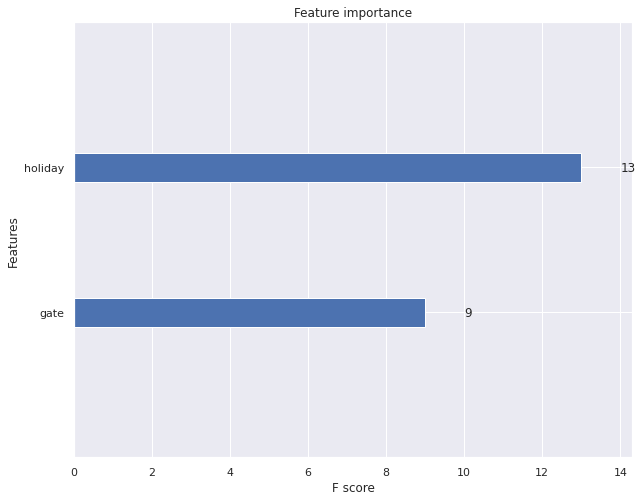

In [83]:
from xgboost import plot_importance
plot_importance(regressor1)

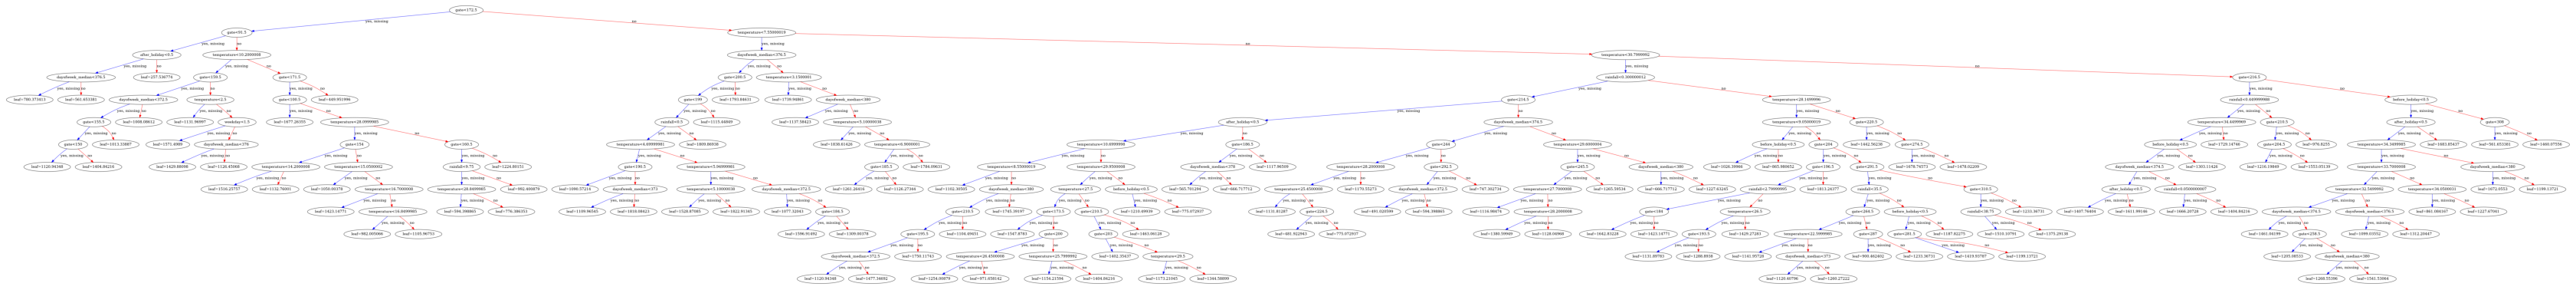

In [242]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(60, 30))
plot_tree(regressor1, num_trees=1, ax=ax)
plt.show()

# 연휴 주간 평일 모델

In [152]:
data1=pd.read_csv('천안input.csv',index_col=0)
train=data[data['timestamp']<'2020-08-16'] 
test=data[(data['timestamp']>='2020-08-17')&(data['timestamp']<='2020-08-21')] 

weekday_data = train[(train['weekday_Sun']!=1)&(train['weekday_Sat']!=1)]

X = weekday_data[weekday_data.columns.difference(['target_value','timestamp','weekday_Sun','weekday_Sat'])]
X_train = pd.DataFrame(X)
y_train = pd.Series(weekday_data['target_value'].values)
XX_test=pd.DataFrame(test[test.columns.difference(['target_value','timestamp','weekday_Sun','weekday_Sat'])])
yy_test=pd.Series(test['target_value'].values)
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
regressor1 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=10
)

regressor1.fit(X_train, y_train, early_stopping_rounds=80,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor1.predict(XX_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

[0]	validation_0-rmse:295.21887
[1]	validation_0-rmse:280.38297
[2]	validation_0-rmse:266.29373
[3]	validation_0-rmse:252.94163
[4]	validation_0-rmse:240.21429
[5]	validation_0-rmse:228.17479
[6]	validation_0-rmse:216.73361
[7]	validation_0-rmse:205.86408
[8]	validation_0-rmse:195.58339
[9]	validation_0-rmse:185.81422
[10]	validation_0-rmse:176.48761
[11]	validation_0-rmse:167.69440
[12]	validation_0-rmse:159.25650
[13]	validation_0-rmse:151.31134
[14]	validation_0-rmse:143.76172
[15]	validation_0-rmse:136.55708
[16]	validation_0-rmse:129.75295
[17]	validation_0-rmse:123.24235
[18]	validation_0-rmse:117.07037
[19]	validation_0-rmse:111.25822
[20]	validation_0-rmse:105.71153
[21]	validation_0-rmse:100.43796
[22]	validation_0-rmse:95.46106
[23]	validation_0-rmse:90.73804
[24]	validation_0-rmse:86.24081
[25]	validation_0-rmse:81.97184
[26]	validation_0-rmse:77.90084
[27]	validation_0-rmse:74.06495
[28]	validation_0-rmse:70.40421
[29]	validation_0-rmse:66.93429
[30]	validation_0-rmse:63.62

10.366261186583507

# 강수량 주간 평일 모델

In [243]:
data=pd.read_csv('천안input.csv',index_col=0)
train=data[data['timestamp']<'2020-08-02'] 
test=data[(data['timestamp']>='2020-08-03')&(data['timestamp']<='2020-08-07')] 

weekday_data = train[(train['weekday_Sun']!=1)&(train['weekday_Sat']!=1)]

X = weekday_data[weekday_data.columns.difference(['target_value','timestamp','weekday_Sun','weekday_Sat'])]
X_train = pd.DataFrame(X)
y_train = pd.Series(weekday_data['target_value'].values)
XX_test=pd.DataFrame(test[test.columns.difference(['target_value','timestamp','weekday_Sun','weekday_Sat'])])
yy_test=pd.Series(test['target_value'].values)
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
regressor1 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=10
)

regressor1.fit(X_train, y_train, early_stopping_rounds=80,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor1.predict(XX_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

[0]	validation_0-rmse:297.56869
[1]	validation_0-rmse:282.77228
[2]	validation_0-rmse:268.67734
[3]	validation_0-rmse:255.29880
[4]	validation_0-rmse:242.55295
[5]	validation_0-rmse:230.53247
[6]	validation_0-rmse:219.05580
[7]	validation_0-rmse:208.17120
[8]	validation_0-rmse:197.91670
[9]	validation_0-rmse:188.14700
[10]	validation_0-rmse:178.75539
[11]	validation_0-rmse:169.97041
[12]	validation_0-rmse:161.54481
[13]	validation_0-rmse:153.53865
[14]	validation_0-rmse:145.90503
[15]	validation_0-rmse:138.69783
[16]	validation_0-rmse:131.85046
[17]	validation_0-rmse:125.36201
[18]	validation_0-rmse:119.18118
[19]	validation_0-rmse:113.31421
[20]	validation_0-rmse:107.75967
[21]	validation_0-rmse:102.45827
[22]	validation_0-rmse:97.41170
[23]	validation_0-rmse:92.62154
[24]	validation_0-rmse:88.09686
[25]	validation_0-rmse:83.82130
[26]	validation_0-rmse:79.71874
[27]	validation_0-rmse:75.81909
[28]	validation_0-rmse:72.14373
[29]	validation_0-rmse:68.65528
[30]	validation_0-rmse:65.32

14.653151003861444

In [111]:
sun_data = data[data['weekday_Sun']==1]
sun_data = sun_data[['target_value', 'dayofweek_median', 'temperature', 'rainfall', 'gate', 'proportion']]

X = sun_data[sun_data.columns.difference(['target_value','timestamp'])]
X = pd.DataFrame(X)
y = pd.Series(sun_data['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor2 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=5
)

regressor2.fit(X_train, y_train, early_stopping_rounds=120,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor2.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

[0]	validation_0-rmse:11.76873
[1]	validation_0-rmse:11.17290
[2]	validation_0-rmse:10.60181
[3]	validation_0-rmse:10.04490
[4]	validation_0-rmse:9.51834
[5]	validation_0-rmse:9.04359
[6]	validation_0-rmse:8.58521
[7]	validation_0-rmse:8.15075
[8]	validation_0-rmse:7.72990
[9]	validation_0-rmse:7.33175
[10]	validation_0-rmse:6.95860
[11]	validation_0-rmse:6.59921
[12]	validation_0-rmse:6.26861
[13]	validation_0-rmse:5.94502
[14]	validation_0-rmse:5.64934
[15]	validation_0-rmse:5.37045
[16]	validation_0-rmse:5.08277
[17]	validation_0-rmse:4.83699
[18]	validation_0-rmse:4.60038
[19]	validation_0-rmse:4.35415
[20]	validation_0-rmse:4.14385
[21]	validation_0-rmse:3.93352
[22]	validation_0-rmse:3.72714
[23]	validation_0-rmse:3.53052
[24]	validation_0-rmse:3.33947
[25]	validation_0-rmse:3.17491
[26]	validation_0-rmse:3.01829
[27]	validation_0-rmse:2.87312
[28]	validation_0-rmse:2.71944
[29]	validation_0-rmse:2.60150
[30]	validation_0-rmse:2.49025
[31]	validation_0-rmse:2.36331
[32]	validatio

1.2025369300696032

In [112]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.2025369300696032

In [126]:
sat_data = data[data['weekday_Sat']==1]
sat_data = sat_data[['target_value', 'dayofweek_median', 'temperature', 'rainfall', 'gate', 'proportion']]

X = sat_data[sat_data.columns.difference(['target_value','timestamp'])]
X = pd.DataFrame(X)
y = pd.Series(sat_data['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor3 = xgb.XGBRegressor(
    n_estimators=700,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=4
)

regressor3.fit(X_train, y_train, early_stopping_rounds=500,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor3.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

[0]	validation_0-rmse:59.02087
[1]	validation_0-rmse:55.99839
[2]	validation_0-rmse:53.10332
[3]	validation_0-rmse:50.31213
[4]	validation_0-rmse:47.68808
[5]	validation_0-rmse:45.16514
[6]	validation_0-rmse:42.86134
[7]	validation_0-rmse:40.58713
[8]	validation_0-rmse:38.44146
[9]	validation_0-rmse:36.43187
[10]	validation_0-rmse:34.52699
[11]	validation_0-rmse:32.72479
[12]	validation_0-rmse:31.00622
[13]	validation_0-rmse:29.35860
[14]	validation_0-rmse:27.81225
[15]	validation_0-rmse:26.36359
[16]	validation_0-rmse:24.96464
[17]	validation_0-rmse:23.52659
[18]	validation_0-rmse:22.32867
[19]	validation_0-rmse:21.17494
[20]	validation_0-rmse:20.07774
[21]	validation_0-rmse:19.07842
[22]	validation_0-rmse:18.11857
[23]	validation_0-rmse:17.19809
[24]	validation_0-rmse:16.38535
[25]	validation_0-rmse:15.57779
[26]	validation_0-rmse:14.81520
[27]	validation_0-rmse:14.06589
[28]	validation_0-rmse:13.40438
[29]	validation_0-rmse:12.73216
[30]	validation_0-rmse:12.08082
[31]	validation_0-

21.11072506830688

In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.11072506830688

In [20]:
data3

,timestamp,target_value,dayofweek_mean,dayofweek_median,weekday,temperature,rainfall,holiday,before_holiday,after_holiday,abnormal,gate
0,2019-01-02,479,368,378,2,3.7,0.0,0,0,1,0,191.0
1,2019-01-03,486,366,374,3,5.2,0.0,0,0,0,0,194.0
2,2019-01-04,483,363,371,4,6.7,0.0,0,0,0,0,203.0
3,2019-01-07,480,371,375,0,5.4,0.0,0,0,0,0,177.0
4,2019-01-08,484,382,382,1,4.8,0.0,0,0,0,0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...
431,2020-09-23,443,368,378,2,23.3,0.0,0,0,0,1,307.0
432,2020-09-24,441,366,374,3,23.5,0.0,0,0,0,1,305.0
451,2020-10-27,404,382,382,1,21.5,0.0,0,0,0,1,318.0
452,2020-10-28,401,368,378,2,21.4,0.0,0,0,0,1,311.0


In [19]:
data1=data[data['target_value']<350]
data2=data[(350<=data['target_value'])&(data['target_value']<400)]
data3=data[400<=data['target_value']]

In [24]:
train=data3[data3['timestamp']<'2020-08-30'] 
weekday_data = train[(train['weekday']!=5)&(train['weekday']!=6)]
X_train1 = pd.DataFrame(weekday_data[weekday_data.columns.difference(['target_value','timestamp'])])
y_train1 = pd.Series(weekday_data['target_value'].values)

test=data3[(data3['timestamp']>='2020-09-07')&(data3['timestamp']<='2020-09-11')] 
XX_test=pd.DataFrame(test[test.columns.difference(['target_value','timestamp'])])
yy_test=pd.Series(test['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1)
regressor3 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=12
)

regressor3.fit(X_train, y_train, early_stopping_rounds=140,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor3.predict(XX_test)


from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

train=data2[data2['timestamp']<'2020-08-30'] 
weekday_data = train[(train['weekday']!=5)&(train['weekday']!=6)]
X_train1 = pd.DataFrame(weekday_data[weekday_data.columns.difference(['target_value','timestamp'])])
y_train1 = pd.Series(weekday_data['target_value'].values)

test=data2[(data2['timestamp']>='2020-09-07')&(data2['timestamp']<='2020-09-11')] 
XX_test=pd.DataFrame(test[test.columns.difference(['target_value','timestamp'])])
yy_test=pd.Series(test['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1)
regressor2 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=12
)

regressor2.fit(X_train, y_train, early_stopping_rounds=140,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor2.predict(XX_test)


from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

[0]	validation_0-rmse:418.48218
[1]	validation_0-rmse:397.66836
[2]	validation_0-rmse:377.87549
[3]	validation_0-rmse:359.08218
[4]	validation_0-rmse:341.16263
[5]	validation_0-rmse:324.14358
[6]	validation_0-rmse:308.05057
[7]	validation_0-rmse:292.61764
[8]	validation_0-rmse:277.88110
[9]	validation_0-rmse:264.05954
[10]	validation_0-rmse:250.93086
[11]	validation_0-rmse:238.31918
[12]	validation_0-rmse:226.56599
[13]	validation_0-rmse:215.40376
[14]	validation_0-rmse:204.61159
[15]	validation_0-rmse:194.38316
[16]	validation_0-rmse:184.85324
[17]	validation_0-rmse:175.64763
[18]	validation_0-rmse:166.91244
[19]	validation_0-rmse:158.62347
[20]	validation_0-rmse:150.85126
[21]	validation_0-rmse:143.33124
[22]	validation_0-rmse:136.22066
[23]	validation_0-rmse:129.43553
[24]	validation_0-rmse:123.02483
[25]	validation_0-rmse:116.93121
[26]	validation_0-rmse:111.24428
[27]	validation_0-rmse:105.84212
[28]	validation_0-rmse:100.66215
[29]	validation_0-rmse:95.69509
[30]	validation_0-rms

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [26]:
train=data1[data1['timestamp']<'2020-08-30'] 
weekday_data = train[(train['weekday']!=5)&(train['weekday']!=6)]
X_train1 = pd.DataFrame(weekday_data[weekday_data.columns.difference(['target_value','timestamp'])])
y_train1 = pd.Series(weekday_data['target_value'].values)

test=data1[(data1['timestamp']>='2020-09-07')&(data1['timestamp']<='2020-09-11')] 
XX_test=pd.DataFrame(test[test.columns.difference(['target_value','timestamp'])])
yy_test=pd.Series(test['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1)
regressor1 = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=0.01,
    learning_rate=0.05,
    gamma=7,
    max_depth=12
)

regressor1.fit(X_train, y_train, early_stopping_rounds=140,eval_metric="rmse", eval_set=[(X_test,y_test)])
y_pred = regressor1.predict(XX_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(yy_test, y_pred)**0.5

[0]	validation_0-rmse:297.81116
[1]	validation_0-rmse:283.14453
[2]	validation_0-rmse:269.59149
[3]	validation_0-rmse:256.38525
[4]	validation_0-rmse:244.16672
[5]	validation_0-rmse:232.22069
[6]	validation_0-rmse:221.20163
[7]	validation_0-rmse:210.97372
[8]	validation_0-rmse:201.02919
[9]	validation_0-rmse:191.48151
[10]	validation_0-rmse:182.74171
[11]	validation_0-rmse:174.24120
[12]	validation_0-rmse:166.21782
[13]	validation_0-rmse:158.73614
[14]	validation_0-rmse:151.52278
[15]	validation_0-rmse:144.80171
[16]	validation_0-rmse:138.39830
[17]	validation_0-rmse:132.31741
[18]	validation_0-rmse:126.49495
[19]	validation_0-rmse:121.06832
[20]	validation_0-rmse:115.85892
[21]	validation_0-rmse:111.04919
[22]	validation_0-rmse:106.42203
[23]	validation_0-rmse:102.11891
[24]	validation_0-rmse:97.89700
[25]	validation_0-rmse:94.07958
[26]	validation_0-rmse:90.44567
[27]	validation_0-rmse:87.08320
[28]	validation_0-rmse:83.92332
[29]	validation_0-rmse:80.97185
[30]	validation_0-rmse:78.

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [27]:
train

,timestamp,target_value,dayofweek_mean,dayofweek_median,weekday,temperature,rainfall,holiday,before_holiday,after_holiday,abnormal,gate
22,2019-02-01,325,363,371,4,4.7,0.0,0,0,0,0,178.0
23,2019-02-07,252,366,374,3,8.4,0.0,0,0,1,0,177.0
59,2019-04-01,284,371,375,0,11.9,0.0,0,0,0,0,122.0
68,2019-04-12,319,363,371,4,18.9,0.0,0,0,0,0,181.0
81,2019-05-01,330,368,378,2,24.1,0.0,0,0,0,0,203.0
122,2019-07-01,340,371,375,0,27.0,0.0,0,0,0,0,196.0
142,2019-07-29,300,371,375,0,33.2,0.0,0,0,0,1,160.0
143,2019-07-30,331,382,382,1,34.6,0.0,0,0,0,1,160.0
173,2019-09-11,300,368,378,2,30.0,0.0,0,1,0,1,197.0
174,2019-09-16,270,371,375,0,28.3,0.0,0,0,0,1,202.0


In [25]:
# data = data.iloc[:,1:]

# # 변수 재선언 및 확인
# data = pd.get_dummies(data)
# X=data[data.columns.difference(['Churn'])]

# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# X = pd.DataFrame(X).dropna()
# y = pd.Series(data['Churn'].values)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# # Running logistic regression model #로지스틱 회귀 분석 모형 실행
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(max_iter=1000, C=2.7, penalty='l2')
# result = lr.fit(X_train, y_train)

# from sklearn import metrics
# prediction_test = lr.predict(X_test)


X = data[data.columns.difference(['target_value','timestamp'])]
X = pd.DataFrame(X)
y = pd.Series(data['target_value'].values)

import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.ensemble import VotingRegressor
clf=VotingRegressor(estimators=[('xgb1',regressor1),('xgb2',regressor2),('xgb3',regressor3)])
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

3015.6937755375893